In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
%matplotlib inline

In [2]:
space = np.linspace(-2,2,1000)
space

array([-2.        , -1.995996  , -1.99199199, -1.98798799, -1.98398398,
       -1.97997998, -1.97597598, -1.97197197, -1.96796797, -1.96396396,
       -1.95995996, -1.95595596, -1.95195195, -1.94794795, -1.94394394,
       -1.93993994, -1.93593594, -1.93193193, -1.92792793, -1.92392392,
       -1.91991992, -1.91591592, -1.91191191, -1.90790791, -1.9039039 ,
       -1.8998999 , -1.8958959 , -1.89189189, -1.88788789, -1.88388388,
       -1.87987988, -1.87587588, -1.87187187, -1.86786787, -1.86386386,
       -1.85985986, -1.85585586, -1.85185185, -1.84784785, -1.84384384,
       -1.83983984, -1.83583584, -1.83183183, -1.82782783, -1.82382382,
       -1.81981982, -1.81581582, -1.81181181, -1.80780781, -1.8038038 ,
       -1.7997998 , -1.7957958 , -1.79179179, -1.78778779, -1.78378378,
       -1.77977978, -1.77577578, -1.77177177, -1.76776777, -1.76376376,
       -1.75975976, -1.75575576, -1.75175175, -1.74774775, -1.74374374,
       -1.73973974, -1.73573574, -1.73173173, -1.72772773, -1.72

In [3]:
line = space ** 2
line

array([4.00000000e+00, 3.98400002e+00, 3.96803210e+00, 3.95209624e+00,
       3.93619245e+00, 3.92032072e+00, 3.90448106e+00, 3.88867346e+00,
       3.87289792e+00, 3.85715445e+00, 3.84144304e+00, 3.82576370e+00,
       3.81011642e+00, 3.79450121e+00, 3.77891806e+00, 3.76336697e+00,
       3.74784795e+00, 3.73236099e+00, 3.71690610e+00, 3.70148327e+00,
       3.68609250e+00, 3.67073380e+00, 3.65540716e+00, 3.64011259e+00,
       3.62485008e+00, 3.60961963e+00, 3.59442125e+00, 3.57925493e+00,
       3.56412068e+00, 3.54901849e+00, 3.53394836e+00, 3.51891030e+00,
       3.50390430e+00, 3.48893037e+00, 3.47398850e+00, 3.45907870e+00,
       3.44420096e+00, 3.42935528e+00, 3.41454167e+00, 3.39976012e+00,
       3.38501064e+00, 3.37029322e+00, 3.35560786e+00, 3.34095457e+00,
       3.32633334e+00, 3.31174418e+00, 3.29718708e+00, 3.28266204e+00,
       3.26816907e+00, 3.25370816e+00, 3.23927932e+00, 3.22488254e+00,
       3.21051783e+00, 3.19618517e+00, 3.18188459e+00, 3.16761606e+00,
      

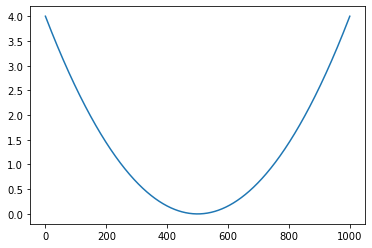

In [4]:
plt.plot(line)

In [5]:
def f(x):
    return x**2
def derivative(x):
    return 2*x

In [6]:
def gradient_decent(error, tolerance, alpha, x):
    iteration = 1
    max_iteration = 200
    plt.plot(space, f(space), color='y')
    plt.xlabel('x')
    plt.ylabel('y')
    # plt.show()
    filenames = []
    while error > tolerance and iteration < max_iteration:
        grad = derivative(x)
        x_old = x
        x -= alpha * grad
        plt.arrow(x, f(x),(x_old - x), (f(x_old)-f(x)),color = "r", width=0.0125, length_includes_head=True, head_width = 0.1, head_length = 0.2)
        filename = f'{iteration}.png'
        filenames.append(filename)
        plt.savefig(filename)
        error = abs(grad)
        iteration += 1

    plt.show()

    with imageio.get_writer(f'mygif_alpha_{alpha}.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    for filename in set(filenames):
        os.remove(filename)

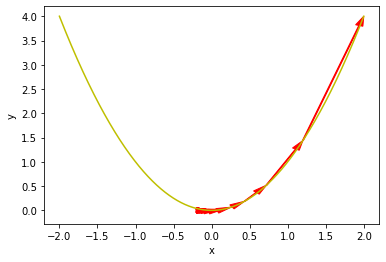

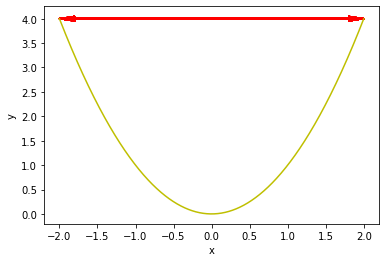

In [154]:
error = 1.0
tolerance = 1e-5
x = 2

gradient_decent(error=error,tolerance=tolerance,alpha=0.2,x=x)
gradient_decent(error=error,tolerance=tolerance,alpha=1,x=x)
# gradient_decent(error=error,tolerance=tolerance,alpha=2,x=x)

Dùng thuật toán logistic regression phân loại hồ sơ cho vay hay không với dữ liệu ở đây (https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv), input là lương, thời gian làm việc, output là cho vay hay không.
xây dựng model, tìm tham số.
dự đoán với các hồ sơ sau: (lương 2, thời gian: 3), (lương: 1, thời gian: 8), (lương: 5, thời gian: 5).

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')
data

,Lương,Thời gian làm việc,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [45]:
data = data.rename(columns={'Lương': 'x1', 'Thời gian làm việc': 'x2', 'Cho vay': 'y'})
data

,x1,x2,y
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [46]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

,x1,x2,y
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


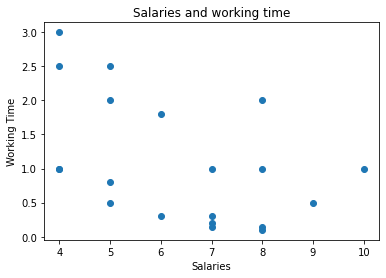

In [51]:
x1 = data['x1']
x2 = data['x2']
Y = data['y']

plt.scatter(x1,x2)
plt.title('Salaries and working time')
plt.xlabel('Salaries')
plt.ylabel('Working Time')
plt.show()

In [57]:
x = data[['x1', 'x2']]
x

,x1,x2
0,10,1.00
1,5,2.00
2,6,1.80
3,7,1.00
4,8,2.00
5,9,0.50
6,4,3.00
7,5,2.50
8,8,1.00
9,4,2.50


In [63]:
x_allow = x[Y==1]
x_decline = x[Y==0]

,x1,x2
0,10,1.0
1,5,2.0
2,6,1.8
3,7,1.0
4,8,2.0
5,9,0.5
6,4,3.0
7,5,2.5
8,8,1.0
9,4,2.5


Text(0, 0.5, 'time')

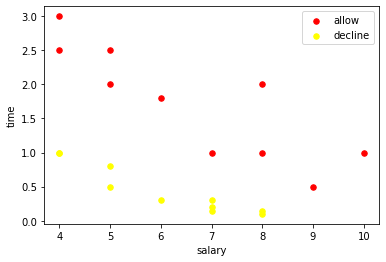

In [69]:
plt.scatter(x_allow['x1'], x_allow['x2'], c='red', edgecolors='red', s=30, label='allow')
plt.scatter(x_decline['x1'], x_decline['x2'], c='yellow', edgecolors='yellow', s=30, label='decline')
plt.legend(loc=1)
plt.xlabel('salary')
plt.ylabel('time')